# Analizando datos dinamicamente

Este codigo sugiere que el usuario puede pasar una muestra en (CSV, xlxs), y potencialmente otros delimiitadores, luego dice de que trata el analisis deseado, luego se procesan dinamicamente los datos.



Con este enfoque podemos escalar la complejidad de el programa a preguntas clave para obtener insights de la data proveida desde un principio.

In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [329]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [330]:
plt.style.use('seaborn-v0_8-whitegrid')

### Enunciado de Contextualización
Un profesor quiere evaluar el rendimiento de sus estudiantes en un examen de matemáticas. Ha registrado las calificaciones de 30 estudiantes en una hoja de cálculo de Excel. Tu tarea es analizar estos datos y proporcionar medidas de centralización, una tabla de distribución y gráficos relevantes.

Dado que:
* Son 30 estudiantes
* El profesor quiere evaluar el rendimiento de ellos
* Las calificaciones estan en una Hoja de calculo.

Asumamos que el profesor ya extrajo los datos en un formato de archivo delimitador, como  CSV (COMMA SEPARATED VALUES)
y simulemos una matriz 5*6 o 6*5 que de igual modo seria 30.

* Notese que los datos deben ser de un mismo tipo, o al menos compartir un dominio.

Dicho esto podriamos a empezar a pasar los  datos automaticamente por la maquina.


Ya yo dos bloques siguientes he seteado el tamaño de la matriz.
```python
np.random.seed(12)
size=np.random.randint(low=5, high=10, size=2)

```

In [331]:
#np.random.seed(12)
#size=np.random.randint(low=5, high=6, size=2)

size= (5,6)

In [332]:
key = [f'c{i}' for i in range(size[1]) ]
key

['c0', 'c1', 'c2', 'c3', 'c4', 'c5']

In [333]:
np.random.seed(12)
notas = pd.DataFrame(np.random.randint(low=70, high=100, size=size), columns=key)

In [334]:
# Crear tabla de frecuencia
notas

,c0,c1,c2,c3,c4,c5
0,81,97,76,99,87,72
1,73,73,82,86,92,87
2,90,75,83,95,72,81
3,92,80,70,91,78,82
4,83,88,95,73,74,73


In [335]:
notas.info

<bound method DataFrame.info of    c0  c1  c2  c3  c4  c5
0  81  97  76  99  87  72
1  73  73  82  86  92  87
2  90  75  83  95  72  81
3  92  80  70  91  78  82
4  83  88  95  73  74  73>

In [336]:
notas.head()

,c0,c1,c2,c3,c4,c5
0,81,97,76,99,87,72
1,73,73,82,86,92,87
2,90,75,83,95,72,81
3,92,80,70,91,78,82
4,83,88,95,73,74,73


In [337]:
notas.columns[3]

'c3'

In [338]:
notas.dtypes

c0    int64
c1    int64
c2    int64
c3    int64
c4    int64
c5    int64
dtype: object

In [339]:
unicos = np.unique(notas)

In [340]:
unicos

array([70, 72, 73, 74, 75, 76, 78, 80, 81, 82, 83, 86, 87, 88, 90, 91, 92,
       95, 97, 99])

In [341]:
minimo = unicos.min()
maximo = unicos.max()
print(f"El dato minimo es: {minimo},", f"El dato maximo es: {maximo}")

El dato minimo es: 70, El dato maximo es: 99


In [342]:
n_total_datos = notas.count().sum()

In [343]:
rango = maximo - minimo;
intervalos = round(1 + 3.322 * np.log10(n_total_datos),2)


def round_to_nearest_odd(n):
    rounded = round(n)
    if rounded % 2 == 0:
        return rounded + 1 if rounded < n else rounded - 1
    return rounded




intervalos = round_to_nearest_odd(intervalos)
amplitud = round(rango / intervalos);
rango, intervalos, amplitud

(29, 5, 6)

In [344]:
index=["min", "max", "ran", "interv", "Amp"]

In [345]:
#variables = pd.DataFrame([int(minimo), int(maximo), int(rango), int(intervalos), int(amplitud)])


#variables = pd.DataFrame({, columns=["Varibles"]})

variables = pd.DataFrame({"Min": int(minimo), "Max": int(maximo), "R": int(rango), "Interv": int(intervalos), "Amp": int(amplitud)}, index=[0])

In [346]:
variables

,Min,Max,R,Interv,Amp
0,70,99,29,5,6


In [347]:
intervalos

5

In [348]:
# limiite inferior
"""
1 - 2
2 - 3
3 - 4
"""
li = [minimo];
ls = [minimo + amplitud]; 


In [349]:
li, ls

([70], [76])

In [350]:
count = 1
while count <=  len(key) +1 and ls.copy().pop() <= maximo:
    li.append(ls.copy().pop())
    #li.append(ls.copy().pop())
    ls.append(ls.copy().pop() + amplitud)

    count+=1


#  observando si el limite superior, es el dato maximo + 1.
if(ls.copy().pop() <= maximo and ls.copy().pop() <= maximo):
    li.append(ls.copy().pop())
    ls.append(ls.copy().pop() + amplitud)
else:
    li
    ls 
#pd.Series()

In [351]:
li, ls

([70, 76, 82, 88, 94], [76, 82, 88, 94, 100])

In [352]:
frec_table = pd.DataFrame({"Li": li, "Ls":ls,})

In [353]:
frec_table

,Li,Ls
0,70,76
1,76,82
2,82,88
3,88,94
4,94,100


In [354]:
# Marca clase
marca_clase = (frec_table['Li'] + frec_table['Ls']) / 2
frec_table["X"] = marca_clase

In [355]:
frec_table

,Li,Ls,X
0,70,76,73.0
1,76,82,79.0
2,82,88,85.0
3,88,94,91.0
4,94,100,97.0


In [356]:
notas

,c0,c1,c2,c3,c4,c5
0,81,97,76,99,87,72
1,73,73,82,86,92,87
2,90,75,83,95,72,81
3,92,80,70,91,78,82
4,83,88,95,73,74,73


In [357]:
unicos


array([70, 72, 73, 74, 75, 76, 78, 80, 81, 82, 83, 86, 87, 88, 90, 91, 92,
       95, 97, 99])

In [358]:
li[0]

70

In [359]:
intervalos

5

In [360]:
frec_table

,Li,Ls,X
0,70,76,73.0
1,76,82,79.0
2,82,88,85.0
3,88,94,91.0
4,94,100,97.0


In [361]:
frec_absoluta = []


# It's always best to try it manually and then refactorize the code, this one's an example.
"""
frec_absoluta.append(notas[(notas >= li[0]) & (notas < ls[0])].count().sum())
frec_absoluta.append(notas[(notas >= li[1]) & (notas < ls[2])].count().sum())
frec_absoluta.append(notas[(notas >= li[3]) & (notas < ls[3])].count().sum())
frec_absoluta.append(notas[(notas >= li[4]) & (notas < ls[4])].count().sum())
frec_absoluta.append(notas[(notas >= li[5]) & (notas < ls[5])].count().sum())
frec_absoluta.append(notas[(notas >= li[6]) & (notas < ls[6])].count().sum())
frec_absoluta.append(notas[(notas >= li[7]) & (notas < ls[7])].count().sum())
"""
for i in range(len(li)):
    frec_absoluta.append(notas[(notas >= li[i]) & (notas < ls[i])].count().sum())


# Aquí nos damos cuenta de que la cantidad de datos y el tamaño de la matriz son equivalentes, de esta manera sabemos que vamos bien
np.sum(frec_absoluta)

30

In [362]:
len(li)

5

In [363]:
frec_table['f'] = frec_absoluta

In [364]:
frec_table

,Li,Ls,X,f
0,70,76,73.0,9
1,76,82,79.0,5
2,82,88,85.0,7
3,88,94,91.0,5
4,94,100,97.0,4


In [365]:
frec_relativa = round(frec_table['f'] / n_total_datos, 4)

frec_table['f r'] = frec_relativa

In [366]:
frec_table

,Li,Ls,X,f,f r
0,70,76,73.0,9,0.3000
1,76,82,79.0,5,0.1667
2,82,88,85.0,7,0.2333
3,88,94,91.0,5,0.1667
4,94,100,97.0,4,0.1333


In [367]:
absoluta_acumulada = frec_table['f'].cumsum()

In [368]:
absoluta_acumulada

0     9
1    14
2    21
3    26
4    30
Name: f, dtype: int64

In [369]:
frec_table['F']  = absoluta_acumulada

In [370]:
frec_table

,Li,Ls,X,f,f r,F
0,70,76,73.0,9,0.3000,9
1,76,82,79.0,5,0.1667,14
2,82,88,85.0,7,0.2333,21
3,88,94,91.0,5,0.1667,26
4,94,100,97.0,4,0.1333,30


In [371]:
porcentual = round(frec_relativa * 100, 2)
porcentual

0    30.00
1    16.67
2    23.33
3    16.67
4    13.33
Name: f, dtype: float64

In [372]:
frec_table['%'] =  porcentual

In [373]:
frec_table

,Li,Ls,X,f,f r,F,%
0,70,76,73.0,9,0.3000,9,30.00
1,76,82,79.0,5,0.1667,14,16.67
2,82,88,85.0,7,0.2333,21,23.33
3,88,94,91.0,5,0.1667,26,16.67
4,94,100,97.0,4,0.1333,30,13.33


In [374]:
pcrt_cum = round(frec_table['%'].cumsum(),2)
pcrt_cum

frec_table['F %'] = pcrt_cum

In [375]:
producto_xf = (marca_clase * frec_absoluta )
producto_xf

0    657.0
1    395.0
2    595.0
3    455.0
4    388.0
dtype: float64

In [376]:
frec_table['xf'] = producto_xf

In [377]:
frec_table

,Li,Ls,X,f,f r,F,%,F %,xf
0,70,76,73.0,9,0.3000,9,30.00,30.00,657.0
1,76,82,79.0,5,0.1667,14,16.67,46.67,395.0
2,82,88,85.0,7,0.2333,21,23.33,70.00,595.0
3,88,94,91.0,5,0.1667,26,16.67,86.67,455.0
4,94,100,97.0,4,0.1333,30,13.33,100.00,388.0


In [378]:
suma_prod_xf = producto_xf.sum()
suma_prod_xf

2490.0

### Formula de  la media

In [379]:
media = round(suma_prod_xf / n_total_datos,2);
media

83.0

In [380]:
division_n_datos = n_total_datos / 2


division_n_datos

15.0

In [381]:
#posicion_mediana =

#Organizo las posiciones mayor o igual a el resultado de la diivision y tomo el primer valor verdadero respecto a la condiición.
posiciones_me_y_alante = frec_table[frec_table['F'] >= division_n_datos].index
posiciones_me_atras = frec_table[frec_table['F'] < division_n_datos].index

#frecuencia absoluta acumulada de la mediana
fab_ac_i = posiciones_me_y_alante[0]
fac_menos_i = posiciones_me_atras[-1]

#  frecuencia absoluta de la mediana
fab_i_me = frec_absoluta[fab_ac_i]
fab_i_me

7

In [382]:
frec_table[frec_table['F'] >= division_n_datos].index

Index([2, 3, 4], dtype='int64')

#### Formula de la mediana


1. Si N es par, aplicamos esta.

![Imagen de formula](formula-mediana-n-par.png)


3.  Si N es impar, aplicamos esta
   
![Imagen de formula](formula-mediana-n-impar.png)

In [383]:
mediana=  0.0;

"""
if (n_total_datos % 2 ==  0):
    # realiza la operación sin sumar 
    mediana = li + ((( n_total_datos / 2) - fac_menos_i) / fab_i_me)
else:
    mediana = li + ( (( (n_total_datos+1) / 2) - fac_menos_i) / fab_i_me)
"""

if (n_total_datos % 2 ==  0):
    # realiza la operación sin sumar 
    mediana = round(li[fab_ac_i] + float((((n_total_datos / 2) - frec_table['F'][fac_menos_i])) / fab_i_me ) * amplitud, 2)
else:
    mediana = round(li[fab_ac_i] + ( (( (n_total_datos +1) / 2) - frec_table['F'][fac_menos_i]) / fab_i_me) * amplitud, 2)  

mediana

82.86

In [384]:
frec_table

,Li,Ls,X,f,f r,F,%,F %,xf
0,70,76,73.0,9,0.3000,9,30.00,30.00,657.0
1,76,82,79.0,5,0.1667,14,16.67,46.67,395.0
2,82,88,85.0,7,0.2333,21,23.33,70.00,595.0
3,88,94,91.0,5,0.1667,26,16.67,86.67,455.0
4,94,100,97.0,4,0.1333,30,13.33,100.00,388.0


In [385]:
moda_pos = frec_table["f"].idxmax()
li_moda = li[moda_pos]

li_moda, moda_pos 

(70, 0)

####  OBSERVANDO UN ERROR AQUÍ.

In [386]:
# encontramos la moda de la siguiente  forma
f_i_menos_uno_mo = frec_absoluta[moda_pos-1];
f_mas_uno_mo = frec_absoluta[moda_pos+1];

# El manejo de listas en Python se comporta de manera que si pedimos el indice -1 nos dara el ultimo de la lista/ serie.
# Por eso en este caso, si la posicion de la moda es 0, no querremos hacer la operacion tipica de la moda, caso contrario si la querriamos hacer.
if(moda_pos == 0):
    moda = round(
       li_moda + float(frec_absoluta[moda_pos] - 0) / ((frec_absoluta[moda_pos] - 0) + (frec_absoluta[moda_pos] - f_mas_uno_mo)) * amplitud
    , 2)
else:
    
    moda = round(
       li_moda + float(frec_absoluta[moda_pos] - f_i_menos_uno_mo) / ((frec_absoluta[moda_pos] - f_i_menos_uno_mo) + (frec_absoluta[moda_pos] - f_mas_uno_mo)) * amplitud
    , 2)
    
moda

74.15

In [387]:
centralizacion = pd.DataFrame({"Media": media, "Mediana": mediana,"Moda": moda}, index=[0])
centralizacion

,Media,Mediana,Moda
0,83.0,82.86,74.15


In [388]:
li_ls = []

interv = 0;
while (len(li_ls) < len(li)):
    li_ls.append(f'[{li[interv]} - {ls[interv]})')
    #li_ls.append(li[interv])
    interv +=1

height = list(frec_table['%'])
li_ls

['[70 - 76)', '[76 - 82)', '[82 - 88)', '[88 - 94)', '[94 - 100)']

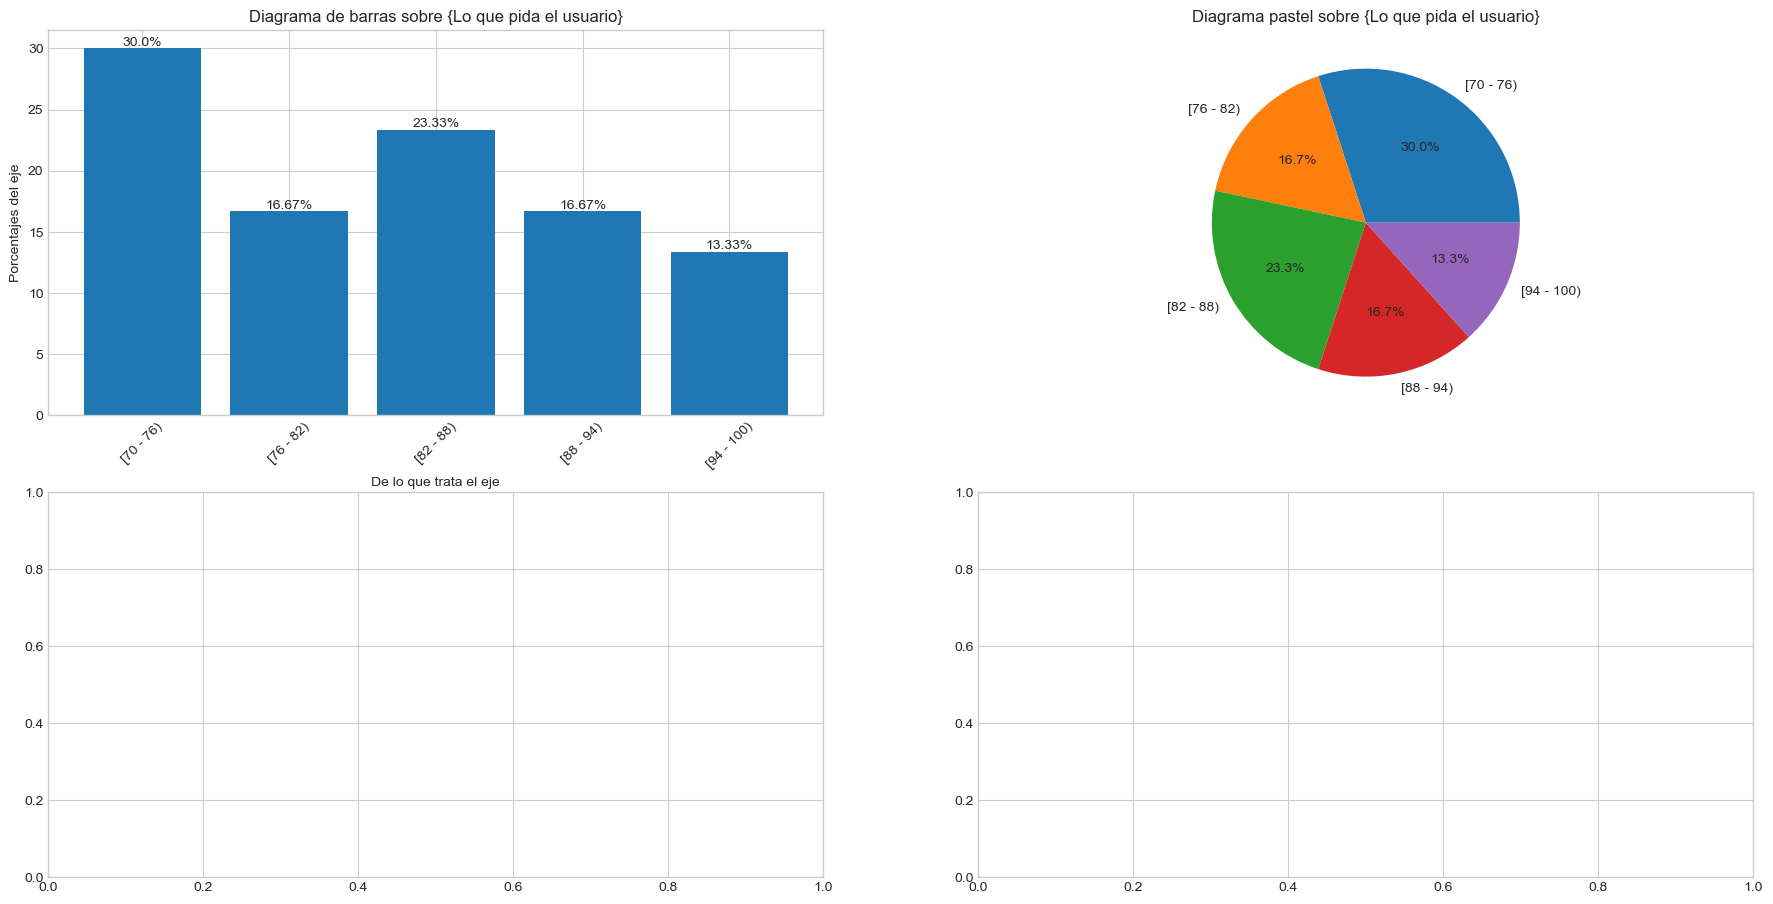

In [389]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(22,11), nrows=2, ncols=2)

barras =  ax1.bar(li_ls, height=height)

ax1.set(
    title='Diagrama de barras sobre {Lo que pida el usuario}',
    xlabel= 'De lo que trata el eje',
    ylabel= 'Porcentajes del eje',
    
    
)


for bar, prt in zip(barras, height):
    altura = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() /2, altura, f'{prt}%', ha='center', va='bottom')


ax1.tick_params(axis='x', rotation=45)


# Repartiendo los trozos del pastel 

pie = ax2.pie(x=height, labels=li_ls, autopct='%1.1f%%');

ax2.set(
    title='Diagrama pastel sobre {Lo que pida el usuario}'
)


"""
ax3.plot([media, media], [0, 100], label='Media', linestyle='--', color='r')
ax3.plot([mediana, mediana], [0, 100], label='Mediana', linestyle='-.', color='g')
ax3.plot([moda, moda], [0, 100], label='Moda', linestyle=':', color='b')
""";


# Luego a lidear con la desviacion standard


### Next stop 

Medidas de dispersión